# File Verification

Check that each electrode sample is what it should be.

In [23]:
def print_total_timestep_count(file_name_list):
    total_row_count = 0
    for path in file_name_list:
        data = np.load(path, mmap_mode="r")
        row_count = data.shape[0]
        total_row_count += row_count
    print(f"The total row count is: {total_row_count}")
    return total_row_count

### Check Normal Files


In [24]:
# imports
import sys
sys.path.append("../../")
import numpy as np
import matplotlib.pyplot as plt
import brain2brain.utils as utils

In [25]:
regular_file_paths = utils.get_file_paths_from_dir("/projects/HASSON/247/data/676-conversations/")

In [11]:
regular_file_paths[0]

'/projects/HASSON/247/data/676-conversations/NY676_616_Part1_conversation1/NY676_616_Part1_conversation1.npy'

(1623762, 114)


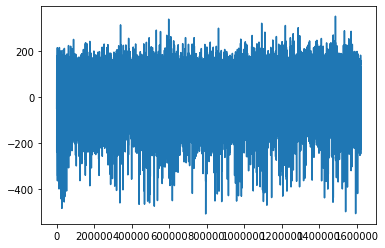

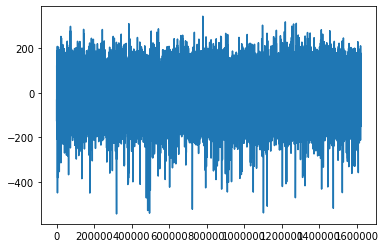

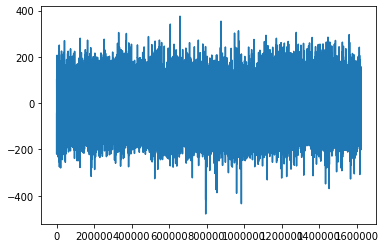

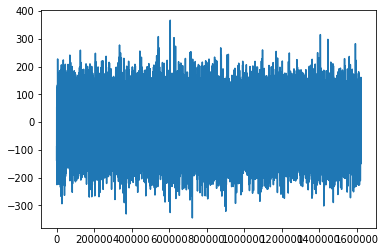

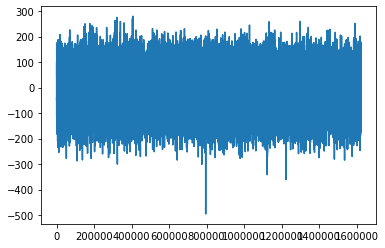

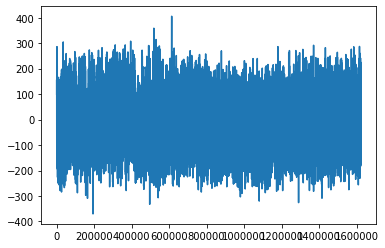

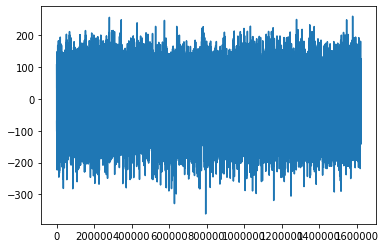

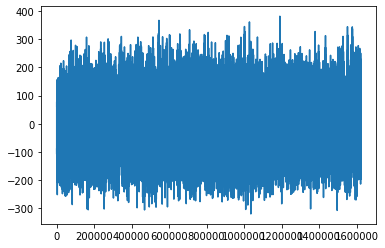

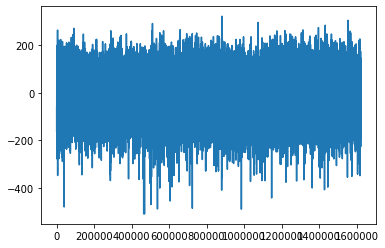

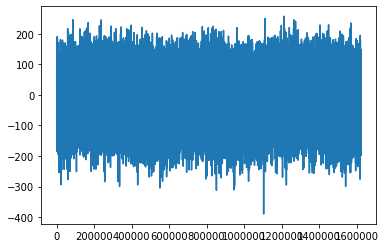

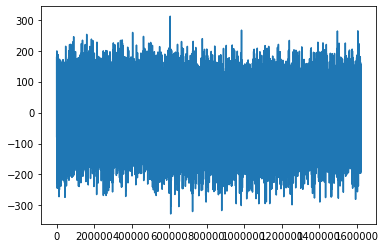

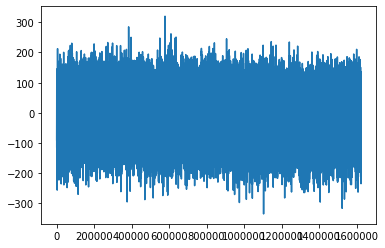

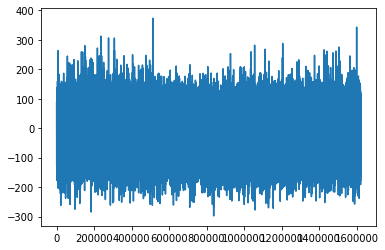

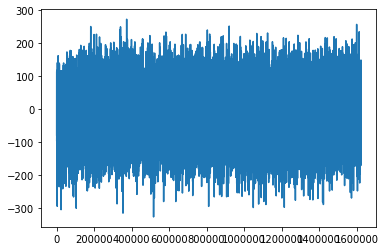

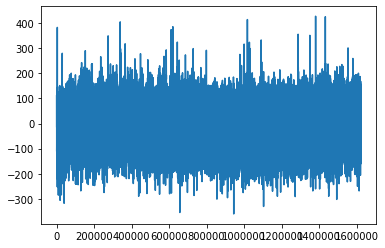

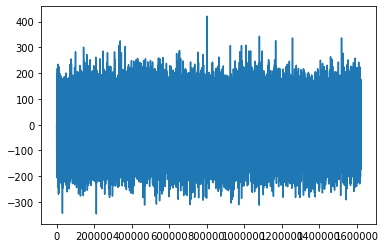

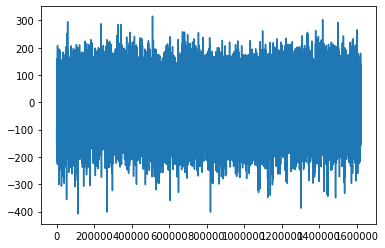

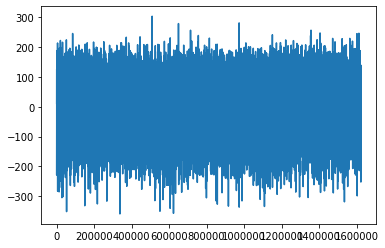

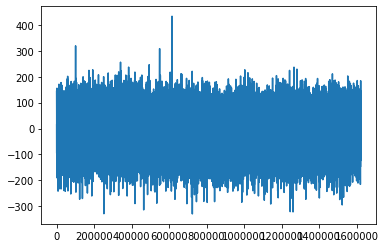

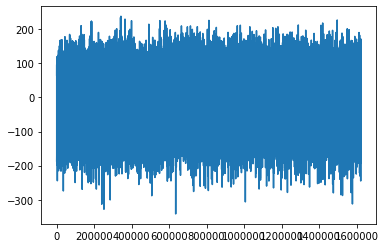

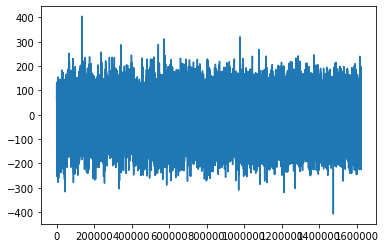

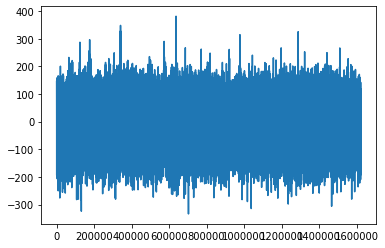

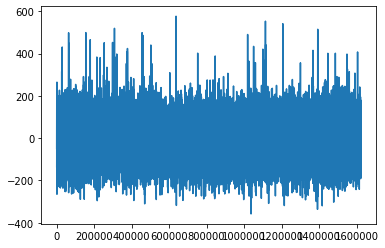

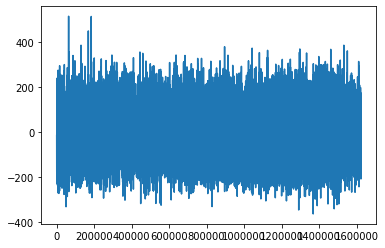

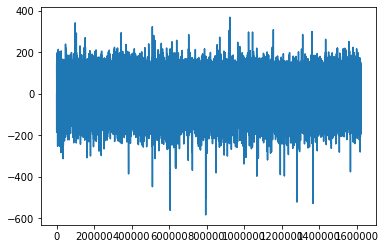

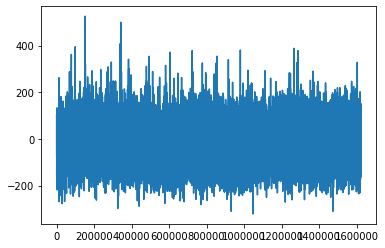

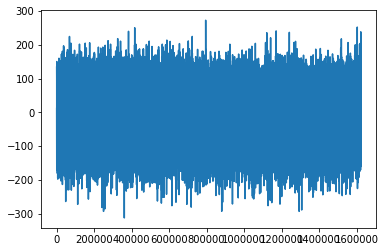

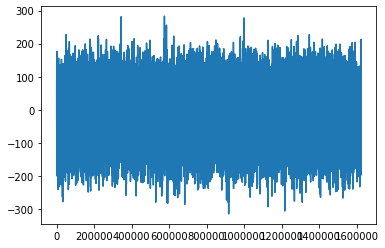

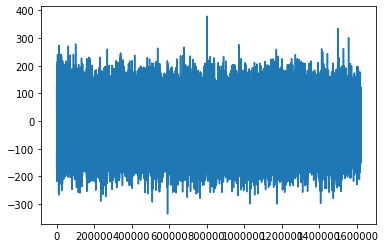

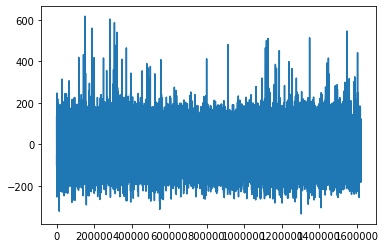

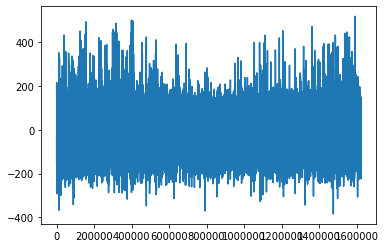

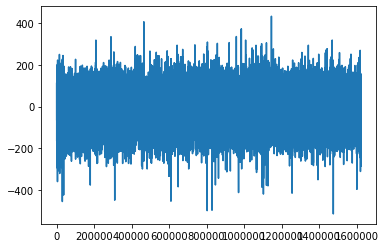

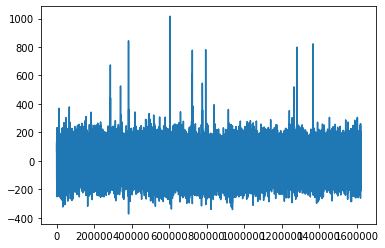

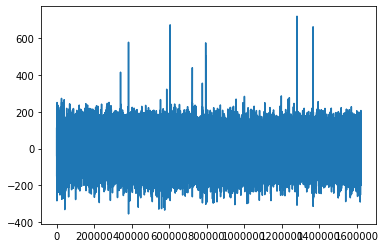

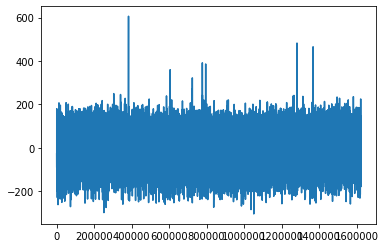

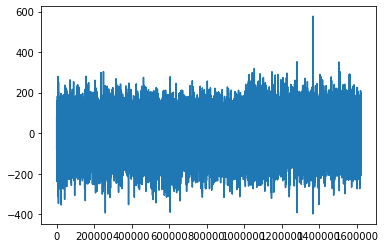

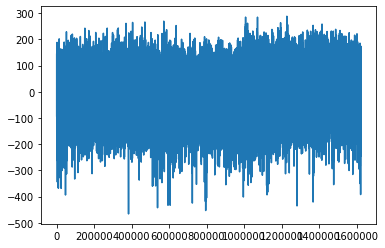

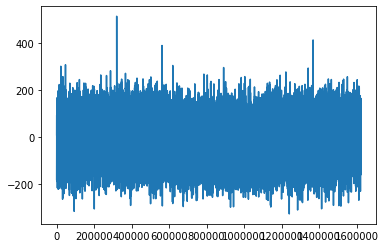

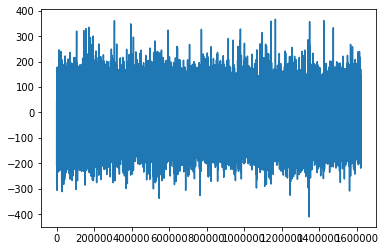

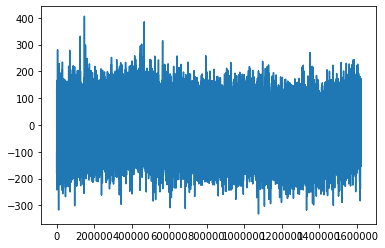

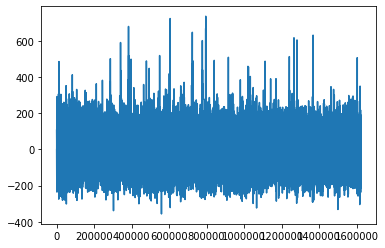

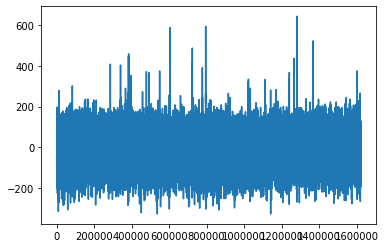

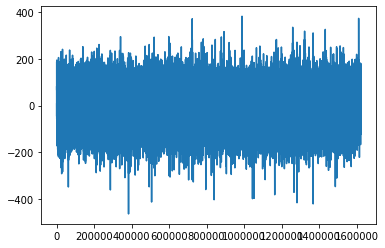

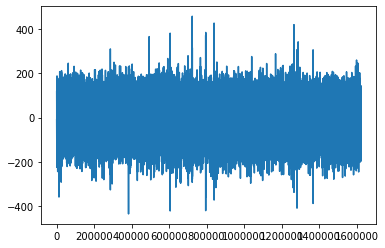

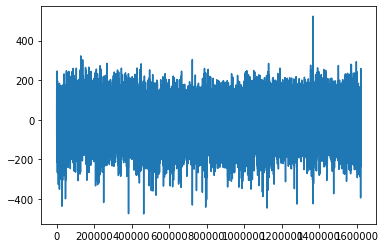

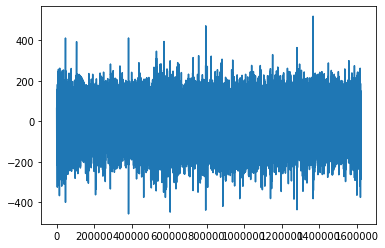

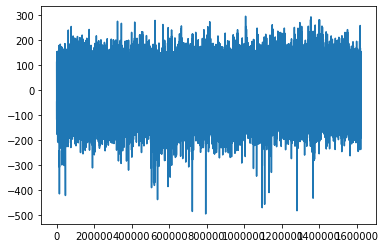

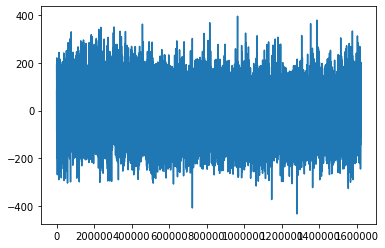

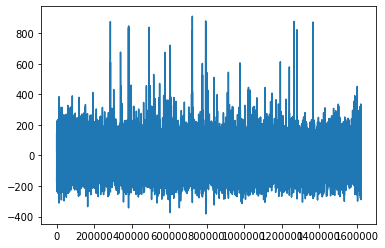

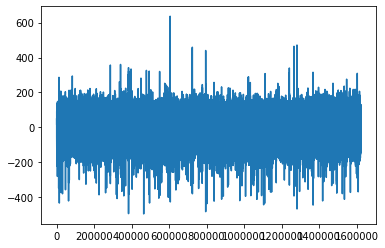

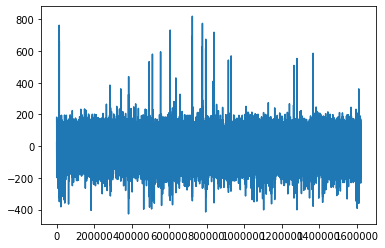

KeyboardInterrupt: 

In [12]:
path = regular_file_paths[0]
data = np.load(path)
print(data.shape)
for electrode in np.arange(data.shape[1]):
    plt.figure()
    plt.plot(data[:,electrode])
    # Show/save figure as desired.
    plt.show()

In [26]:
reg_row_count = print_total_timestep_count(regular_file_paths)

The total row count is: 70518637


In [33]:
print(f"The time recorded for this patient is: {reg_row_count/512} seconds")
print(f"The time recorded for this patient is: {reg_row_count/(512 * 60 * 60)} hours")

The time recorded for this patient is: 137731.712890625 seconds
The time recorded for this patient is: 38.258809136284725 hours


### Check Normalized Files (Old)

In [42]:
old_norm_files = utils.get_file_paths_from_dir("/projects/HASSON/247/data/normalized_conversations/676-conversations-normalized/")

In [43]:
old_norm_files[0]

'/projects/HASSON/247/data/normalized_conversations/676-conversations-normalized/norm_NY676_619_Part5-two_conversation3/norm_NY676_619_Part5-two_conversation3.npy'

In [45]:
old_norm_row_count = print_total_timestep_count(old_norm_files)

The total row count is: 70518637


In [46]:
print(f"The time recorded for this patient is: {old_norm_row_count/512} seconds")
print(f"The time recorded for this patient is: {old_norm_row_count/(512 * 60 * 60)} hours")

The time recorded for this patient is: 137731.712890625 seconds
The time recorded for this patient is: 38.258809136284725 hours


### Check Normalized Files (New)

In [18]:
new_norm_files = utils.get_file_paths_from_dir("/projects/HASSON/247/data/normalized_conversations/676_norm_2/")

In [34]:
new_norm_row_count = print_total_timestep_count(new_norm_files)

The total row count is: 70518637


In [36]:
print(f"The time recorded for this patient is: {new_norm_row_count/512} seconds")
print(f"The time recorded for this patient is: {new_norm_row_count/(512 * 60 * 60)} hours")

The time recorded for this patient is: 137731.712890625 seconds
The time recorded for this patient is: 38.258809136284725 hours


### Check Binned Files (Old)

In [38]:
old_bin_norm_files = utils.get_file_paths_from_dir("/projects/HASSON/247/data/binned_conversations/676_bin_norm/")

In [39]:
old_bin_norm_row_count = print_total_timestep_count(old_bin_norm_files)

The total row count is: 2820710


In [41]:
print(f"The time recorded for this patient is: {(old_bin_norm_row_count * 25)/512} seconds")
print(f"The time recorded for this patient is: {(old_bin_norm_row_count * 25)/(512 * 60 * 60)} hours")

The time recorded for this patient is: 137729.98046875 seconds
The time recorded for this patient is: 38.258327907986114 hours


### Check Binned Files (New)

In [47]:
new_bin_norm_files = utils.get_file_paths_from_dir("/projects/HASSON/247/data/binned_conversations/676_bin_norm_2/")

In [48]:
new_bin_norm_row_count = print_total_timestep_count(new_bin_norm_files)

The total row count is: 2820710


In [49]:
print(f"The time recorded for this patient is: {(new_bin_norm_row_count * 25)/512} seconds")
print(f"The time recorded for this patient is: {(new_bin_norm_row_count * 25)/(512 * 60 * 60)} hours")

The time recorded for this patient is: 137729.98046875 seconds
The time recorded for this patient is: 38.258327907986114 hours
